## Social Media Usage and Emotional Well-Being

### Social media platform used (e.g., Instagram, Twitter, Facebook, LinkedIn, Snapchat, Whatsapp, Telegram).

#### train.csv: Data for training models.
#### test.csv: Data for testing models.
#### val.csv: Data for validation purposes.


### importing libraries

In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [516]:
import warnings
warnings.filterwarnings("ignore")

#### data loding

##### train dataset

In [434]:
train=pd.read_csv("train.csv")

In [435]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


#### test dataset

In [436]:
test=pd.read_csv("test.csv")


In [437]:
test.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


#### val dataset

In [438]:
val = pd.read_csv('val.csv', on_bad_lines='skip')


In [439]:
val.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


#### train data  info

In [440]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


#### test data info

In [517]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    object
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(4)
memory usage: 8.2+ KB


#### validation dats info

In [442]:
val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     145 non-null    int64 
 1   Age                         145 non-null    object
 2   Gender                      145 non-null    object
 3   Platform                    145 non-null    object
 4   Daily_Usage_Time (minutes)  145 non-null    int64 
 5   Posts_Per_Day               145 non-null    int64 
 6   Likes_Received_Per_Day      145 non-null    int64 
 7   Comments_Received_Per_Day   145 non-null    int64 
 8   Messages_Sent_Per_Day       145 non-null    object
 9   Dominant_Emotion            144 non-null    object
dtypes: int64(5), object(5)
memory usage: 11.5+ KB


#### shape train data testing data and validating data sets

In [443]:
train.shape


(1001, 10)

In [444]:
test.shape

(103, 10)

In [445]:
val.shape

(145, 10)

#### chake null values

In [446]:
train.isnull()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False


In [447]:
train.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [448]:
test.isnull()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
98,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False


In [449]:
test.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [450]:
val.isnull()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
140,False,False,False,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False,False,False,False
142,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False


In [451]:
val.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              1
dtype: int64

### EXPLORATORY DATA ANALYSIS (EDA)

In [519]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [520]:
train.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

##### describe training dataset

In [454]:
train.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


#### age distribution

In [521]:
train['Age'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Age, Length: 1001, dtype: bool

In [522]:
train['Age'].isnull().sum()

0

In [457]:
train['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

#### let's  drop/ fill these values first 

In [458]:
train["Age"]=pd.to_numeric(train['Age'],errors='coerce')
train['Age'].fillna(train['Age'].median(), inplace=True)

In [459]:
train['Age'].unique()

array([25., 30., 22., 28., 33., 21., 27., 24., 29., 31., 23., 26., 34.,
       35., 32.])

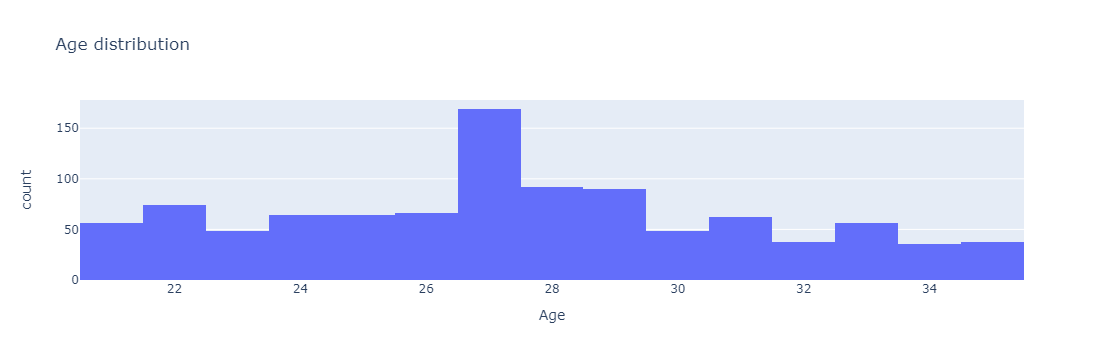

In [523]:
plt=px.histogram(train,x='Age', title='Age distribution')
plt.show()

#### gender distribution

In [524]:
train['Gender']

0           Female
1             Male
2       Non-binary
3           Female
4             Male
           ...    
996     Non-binary
997         Female
998           Male
999     Non-binary
1000        Female
Name: Gender, Length: 1001, dtype: object

In [525]:
train['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

### function to replace numeric values with nan 

In [526]:
def clean_gender_column(gender_value):
    try:
        float(gender_value)
        return np.nan
    except ValueError:
        return gender_value
        train['Gender']=train_gender['Gender'].apply('clean_gender_column')
        train['Gender'].fillna('Unknown', inplace=True)



In [464]:
train['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [527]:
train['Gender']

0           Female
1             Male
2       Non-binary
3           Female
4             Male
           ...    
996     Non-binary
997         Female
998           Male
999     Non-binary
1000        Female
Name: Gender, Length: 1001, dtype: object

In [528]:
train['Gender'].value_counts()

Gender
Female        344
Male          332
Non-binary    248
29             10
27              8
28              8
31              8
22              6
25              6
24              6
33              4
34              4
26              4
21              4
30              2
23              2
35              2
32              2
Name: count, dtype: int64

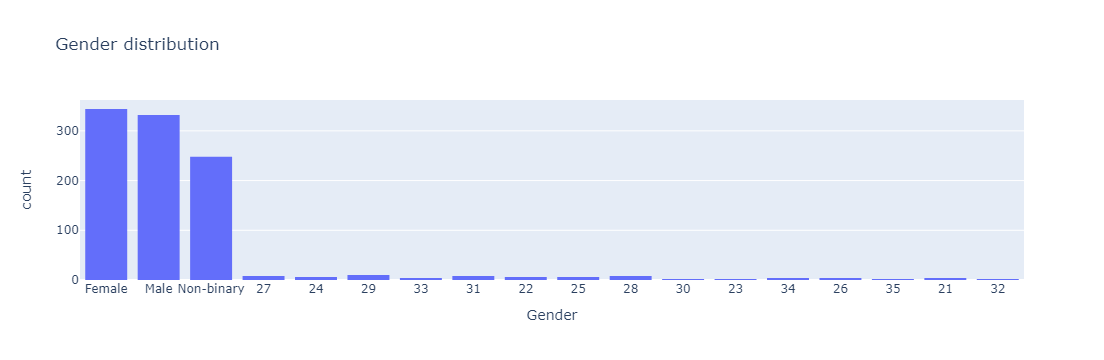

In [529]:
plt=px.histogram( train , x='Gender', title ='Gender distribution')
plt.show()

#### platform Distribution

In [530]:
train['Platform']

0       Instagram
1         Twitter
2        Facebook
3       Instagram
4        LinkedIn
          ...    
996       Twitter
997      Facebook
998      Whatsapp
999      Telegram
1000     Snapchat
Name: Platform, Length: 1001, dtype: object

In [531]:
train['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

In [532]:
train['Platform'].value_counts()

Platform
Instagram    251
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

In [471]:
# filling with mode
train['Platform'].fillna(train['Platform'].mode()[0], inplace=True)

In [472]:
train['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

In [473]:
train['Platform'].value_counts()

Platform
Instagram    251
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

In [474]:
train['Platform'].value_counts()

Platform
Instagram    251
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

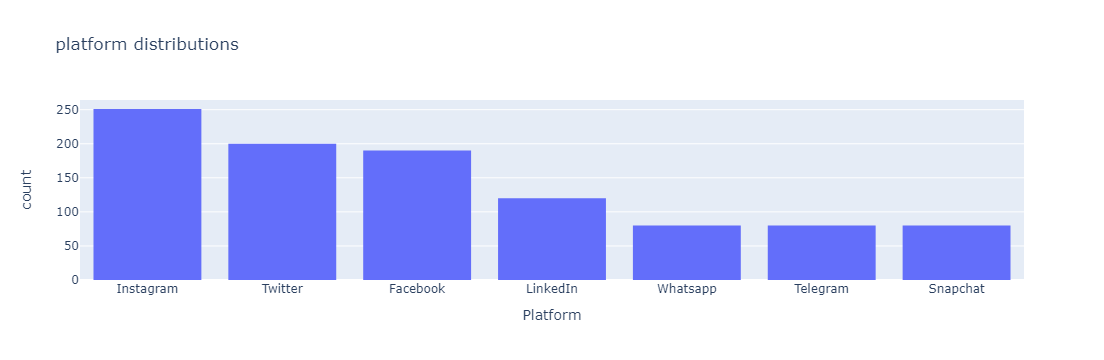

In [533]:
plt=px.histogram(train , x='Platform', title='platform distributions')
plt.show()

####  daily usage time (min) distribution

In [534]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


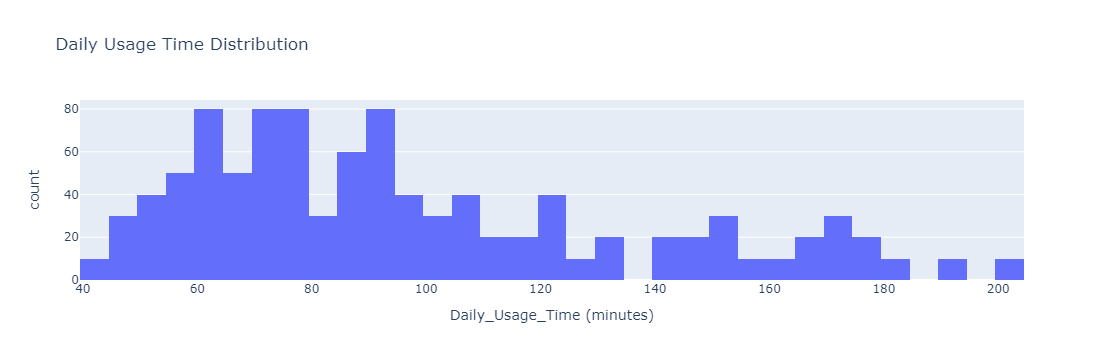

In [535]:
plt = px.histogram(train, x='Daily_Usage_Time (minutes)', title='Daily Usage Time Distribution')
plt.show()

### post per  day  distribution

In [536]:
train['Posts_Per_Day']

0       3.0
1       5.0
2       2.0
3       8.0
4       1.0
       ... 
996     4.0
997     1.0
998     3.0
999     2.0
1000    4.0
Name: Posts_Per_Day, Length: 1001, dtype: float64

In [479]:
train['Posts_Per_Day'].unique()

array([ 3.,  5.,  2.,  8.,  1.,  4.,  6.,  7., nan])

In [480]:
train['Posts_Per_Day'].fillna(train['Posts_Per_Day'].mode()[0] , inplace=True)

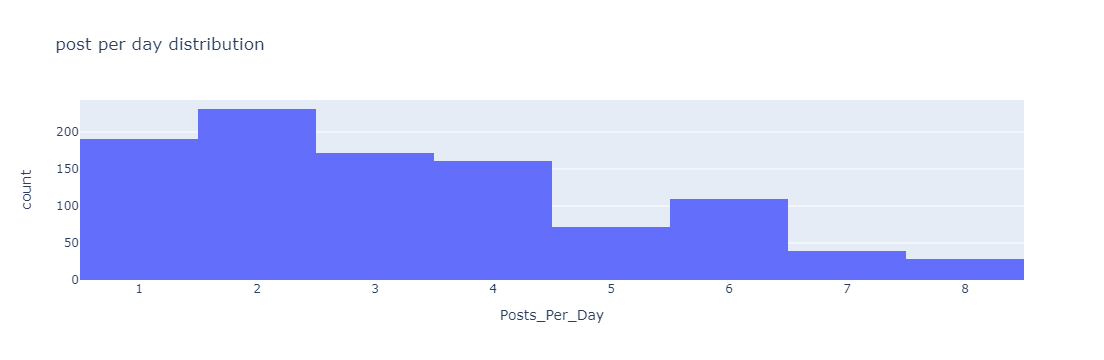

In [537]:
plt=px.histogram(train,  x='Posts_Per_Day', title='post per day distribution')
plt.show()

### like per day  distribution

In [482]:
train['Likes_Received_Per_Day']

0        45.0
1        20.0
2        15.0
3       100.0
4         5.0
        ...  
996      35.0
997      14.0
998      50.0
999      18.0
1000     40.0
Name: Likes_Received_Per_Day, Length: 1001, dtype: float64

In [483]:
train['Likes_Received_Per_Day'].unique()

array([ 45.,  20.,  15., 100.,   5.,  60.,  30.,  25.,  10.,  80.,  35.,
        12.,  90.,  40.,  55.,  33.,   8.,  70.,  28.,  11.,  95.,  18.,
         9.,  85.,  38.,   6.,  13.,  75.,  27.,  88.,  22.,  78.,  29.,
        50.,  36.,  72.,  65., 110.,  14.,  17., 105.,  43.,  37.,  42.,
        48.,  21.,  24.,  23.,  83.,  nan])

In [484]:
train['Likes_Received_Per_Day'].fillna(train['Likes_Received_Per_Day'] .mode()[0],inplace=True)

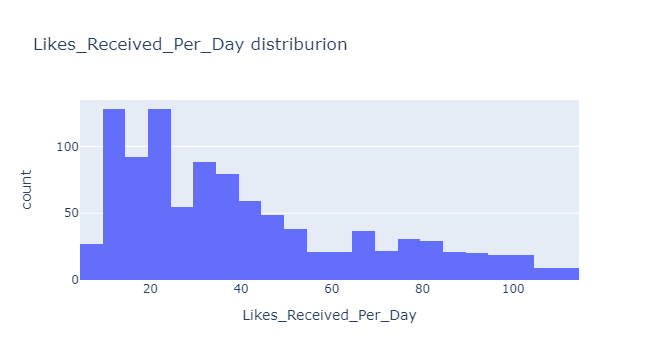

In [485]:
plt=px.histogram(train, x='Likes_Received_Per_Day', title='Likes_Received_Per_Day distriburion')
plt.show()

#### comment per day distribution 

In [486]:
train['Comments_Received_Per_Day']

0       10.0
1       25.0
2        5.0
3       30.0
4        2.0
        ... 
996     18.0
997      6.0
998     25.0
999      8.0
1000    18.0
Name: Comments_Received_Per_Day, Length: 1001, dtype: float64

In [487]:
train['Comments_Received_Per_Day'].unique()

array([10., 25.,  5., 30.,  2., 15., 12.,  3., 20.,  7.,  4., 23., 18.,
       22., 14., 26.,  8., 19., 17., 11.,  6.,  9., 13., 40., 16., 35.,
       38., 28., 36., 33., nan])

In [488]:
train['Comments_Received_Per_Day'].fillna(train['Comments_Received_Per_Day'].mode()[0],inplace=True)

In [489]:
train['Comments_Received_Per_Day'].unique()

array([10., 25.,  5., 30.,  2., 15., 12.,  3., 20.,  7.,  4., 23., 18.,
       22., 14., 26.,  8., 19., 17., 11.,  6.,  9., 13., 40., 16., 35.,
       38., 28., 36., 33.])

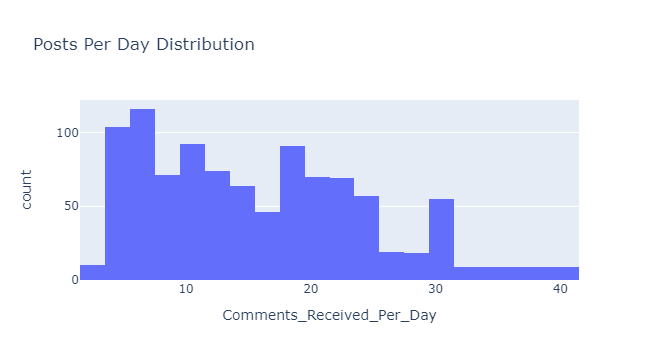

In [490]:
plt=px.histogram(train ,  x='Comments_Received_Per_Day', title='Posts Per Day Distribution')
plt.show()

### messages per day distribution

In [491]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


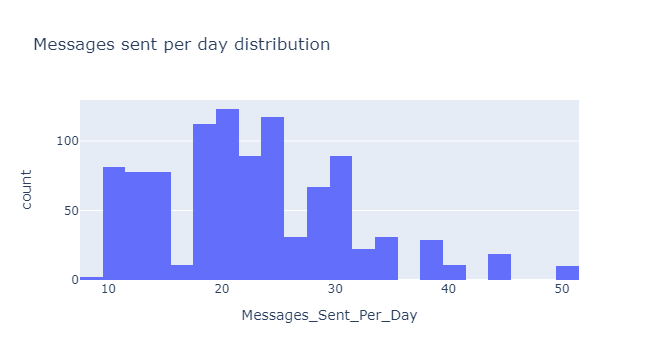

In [492]:
plt = px.histogram(train, x='Messages_Sent_Per_Day', title='Messages sent per day distribution')
plt.show()

### Emotion distribution

In [493]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [494]:
# fill with mode
train['Dominant_Emotion'].fillna(train['Dominant_Emotion'].mode()[0], inplace=True)

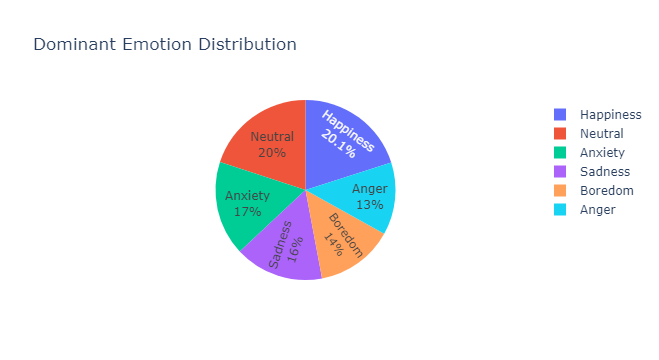

In [495]:
plt = px.pie(train, names='Dominant_Emotion', title='Dominant Emotion Distribution')
# adding the values to the pie section
plt.update_traces(textposition='inside', textinfo='percent+label')
plt.show()

### realtionship between variables

In [496]:
grouped=train.groupby(['Gender'	,'Platform'])
counts=grouped.size()
print(counts)

Gender      Platform 
21          Facebook       2
            Snapchat       2
22          Snapchat       2
            Twitter        2
            Whatsapp       2
23          Whatsapp       2
24          Instagram      2
            Snapchat       2
            Twitter        2
25          Telegram       4
            Twitter        2
26          Snapchat       2
            Twitter        2
27          Facebook       2
            Instagram      2
            Telegram       2
            Whatsapp       2
28          Instagram      2
            Snapchat       2
            Twitter        2
            Whatsapp       2
29          Facebook       6
            Snapchat       2
            Whatsapp       2
30          Instagram      2
31          LinkedIn       2
            Telegram       4
            Whatsapp       2
32          Instagram      2
33          Facebook       2
            Instagram      2
34          Instagram      2
            Telegram       2
35          Twitter  

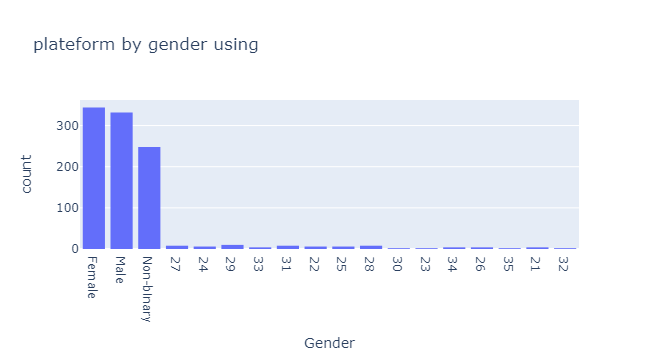

In [497]:
plt=px.histogram(train , x='Gender', title='plateform by gender using')
plt.show()

In [498]:
# grouping age with gender
grouped = train.groupby(['Age', 'Gender'])

# count the number of rows in each group
counts = grouped.size()

# print the counts  
print(counts)

Age   Gender    
21.0  Female        20
      Male          10
      Non-binary    26
22.0  Female        48
      Male           8
      Non-binary    18
23.0  Female        10
      Male           8
      Non-binary    30
24.0  Female        26
      Male          10
      Non-binary    28
25.0  Female        40
      Male          24
26.0  Female         8
      Male          28
      Non-binary    30
27.0  21             4
      22             6
      23             2
      24             6
      25             6
      26             4
      27             8
      28             8
      29            10
      30             2
      31             8
      32             2
      33             4
      34             4
      35             2
      Female        28
      Male          44
      Non-binary    20
28.0  Female        36
      Male          28
      Non-binary    28
29.0  Female        28
      Male          30
      Non-binary    32
30.0  Female         8
      Male       

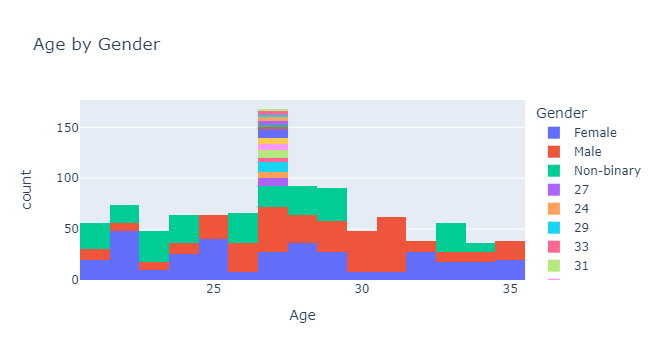

In [499]:
plt = px.histogram(train, x='Age', color='Gender', title='Age by Gender')
plt.show()

### Gender and Platform VS Daily Usage Time (minutes)

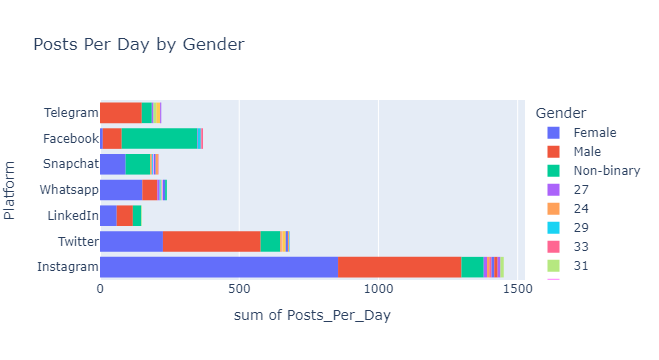

In [500]:
plt = px.histogram(train, x='Posts_Per_Day', y='Platform' ,color='Gender', title='Posts Per Day by Gender')
plt.show()

## gender vs emotions

In [501]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [502]:
grouped=train.groupby(['Gender' , 'Dominant_Emotion'])
counts=grouped.size()

In [503]:
counts

Gender      Dominant_Emotion
21          Neutral               4
22          Anxiety               2
            Neutral               2
            Sadness               2
23          Anger                 2
24          Anger                 2
            Happiness             4
25          Boredom               2
            Neutral               2
            Sadness               2
26          Anxiety               2
            Sadness               2
27          Anxiety               2
            Boredom               2
            Happiness             2
            Neutral               2
28          Anxiety               4
            Happiness             4
29          Anger                 2
            Boredom               4
            Neutral               2
            Sadness               2
30          Happiness             2
31          Anxiety               2
            Neutral               2
            Sadness               4
32          Happiness             2

In [505]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


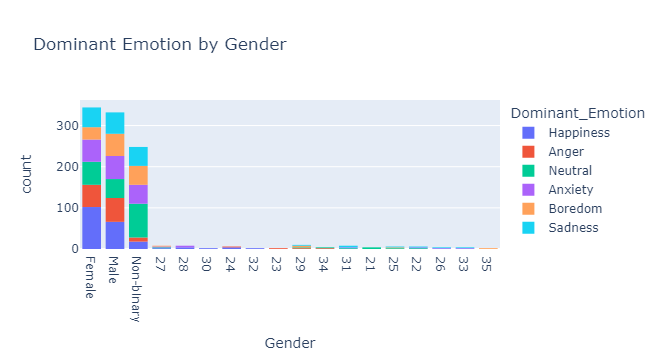

In [504]:
# ploting
plt = px.histogram(train, x='Gender', color='Dominant_Emotion', title='Dominant Emotion by Gender')
plt.show()

### platform vs emotions

In [512]:
grouped=train.groupby(['Platform', 'Dominant_Emotion'  ])
counts=grouped.size()
counts

Platform   Dominant_Emotion
Facebook   Anxiety              50
           Boredom              40
           Neutral              70
           Sadness              30
Instagram  Anger                10
           Anxiety              30
           Happiness           171
           Neutral              20
           Sadness              20
LinkedIn   Anxiety              20
           Boredom              70
           Neutral              20
           Sadness              10
Snapchat   Anxiety              20
           Happiness            10
           Neutral              20
           Sadness              30
Telegram   Anger                10
           Anxiety              10
           Boredom              10
           Neutral              30
           Sadness              20
Twitter    Anger                80
           Anxiety              20
           Boredom              20
           Happiness            10
           Neutral              20
           Sadness         

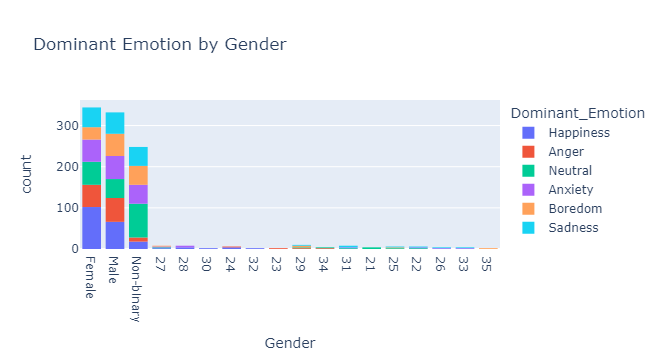

In [514]:
# ploting
plt = px.histogram(train, x='Gender', color='Dominant_Emotion', title='Dominant Emotion by Gender')
plt.show()